<a href="https://colab.research.google.com/github/ritwikraha/CV-Practice/blob/master/Depth_Anything_vitl14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/LiheYoung/Depth-Anything

Cloning into 'Depth-Anything'...
remote: Enumerating objects: 272, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 272 (delta 20), reused 42 (delta 8), pack-reused 204
Receiving objects: 100% (272/272), 107.62 MiB | 29.87 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [2]:
%cd /content/Depth-Anything

/content/Depth-Anything


In [6]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.1/305.1 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.2 MB

In [7]:
import cv2
import torch
import requests
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from depth_anything.dpt import DepthAnything
from depth_anything.util.transform import Resize, NormalizeImage, PrepareForNet
from torchvision.transforms import Compose

In [8]:
# Load the Model from the downloaded repo
model = DepthAnything.from_pretrained("LiheYoung/depth_anything_vitl14")

# Define the tranform
transform = Compose([
        Resize(
            width=518,
            height=518,
            resize_target=False,
            keep_aspect_ratio=True,
            ensure_multiple_of=14,
            resize_method='lower_bound',
            image_interpolation_method=cv2.INTER_CUBIC,
        ),
        NormalizeImage(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        PrepareForNet(),
    ])

config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

In [9]:
# Load the Image
url = "https://i.imgur.com/0FwdO10.jpg"
image = Image.open(requests.get(url, stream=True).raw)
original_image = image.copy()

In [10]:
# Convert the image to RGB to ensure it has 3 channels
if image.mode != 'RGB':
    image = image.convert('RGB')

# Now the transform and tensor conversion should work
image = transform({'image': np.array(image)})['image']
image = torch.from_numpy(image).unsqueeze(0)

In [11]:
chdepth = model(image)

In [12]:
# Use squeeze to remove the first dimension
depth_data = chdepth.squeeze(0).detach().numpy()

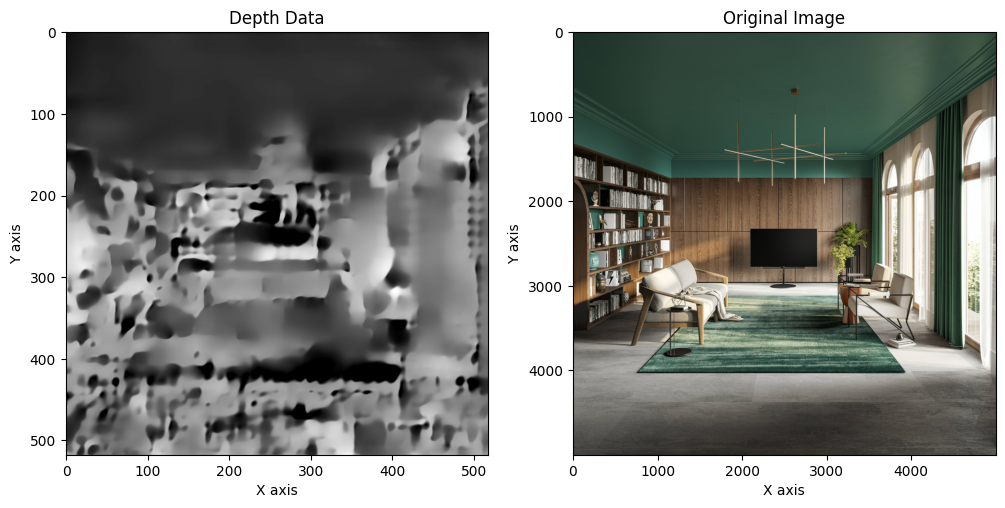

In [14]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Display depth_data on the first subplot
ax1.imshow(depth_data, cmap='gray')
ax1.set_title('Depth Data')
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')

# Display image on the second subplot
ax2.imshow(original_image)
ax2.set_title('Original Image')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')

# Show the figure
plt.show()
